# Bank Loan Analysis Report

# problem statment
## Business Problem
Dream Housing Finance processes thousands of loan applications across urban/rural areas but struggles with manual eligibility checks. Key metrics like annual_income (mean: $69K), dti (13%), loan_amount (~$11K), and grade impact approval rates.[file:70]

**Goal**: Build a machine learning model to predict loan approval probability in real-time from online forms, identifying profitable customer segments.

## Data Science Problem
**Binary Classification**: Predict `loan_status` (Approved/Rejected) using features like:
- Numeric: `annual_income`, `dti`, `int_rate`, `loan_amount`, `installment`, `total_acc`
- Categorical: `grade`, `emp_length`, `home_ownership`, `verification_status`, `term`
- Dates: `issue_date`, `last_payment_date`

**Success Metric**: >80% accuracy; interpret key drivers (DTI/grade impact on defaults).


# Target distribution (add after df.describe())
print("Loan Status Distribution:")
print(df['loan_status'].value_counts(normalize=True))  # If exists, else infer from payments

# Key correlations
numeric_cols = ['annual_inc', 'dti', 'int_rate', 'loan_amnt', 'total_pymnt']
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Loan Predictors Correlation')
plt.show()


### import libraries

In [25]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import plotly.express as px

In [26]:
df = pd.read_excel("financial_loan.xlsx")

In [27]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [28]:
df.info

<bound method DataFrame.info of             id address_state application_type emp_length  \
0      1077430            GA       INDIVIDUAL   < 1 year   
1      1072053            CA       INDIVIDUAL    9 years   
2      1069243            CA       INDIVIDUAL    4 years   
3      1041756            TX       INDIVIDUAL   < 1 year   
4      1068350            IL       INDIVIDUAL  10+ years   
...        ...           ...              ...        ...   
38571   803452            NJ       INDIVIDUAL   < 1 year   
38572   970377            NY       INDIVIDUAL    8 years   
38573   875376            CA       INDIVIDUAL    5 years   
38574   972997            NY       INDIVIDUAL    5 years   
38575   682952            NY       INDIVIDUAL    4 years   

                             emp_title grade home_ownership issue_date  \
0                                Ryder     C           RENT 2021-02-11   
1                       MKC Accounting     E           RENT 2021-01-01   
2                Chemat T

In [29]:
df.isnull().sum()

id                          0
address_state               0
application_type            0
emp_length                  0
emp_title                1438
grade                       0
home_ownership              0
issue_date                  0
last_credit_pull_date       0
last_payment_date           0
loan_status                 0
next_payment_date           0
member_id                   0
purpose                     0
sub_grade                   0
term                        0
verification_status         0
annual_income               0
dti                         0
installment                 0
int_rate                    0
loan_amount                 0
total_acc                   0
total_payment               0
dtype: int64

### Metadata of data

In [30]:
print("No of rows:",df.shape[0])

No of rows: 38576


In [31]:
print("No of columns:",df.shape[1])

No of columns: 24


In [32]:
df.info

<bound method DataFrame.info of             id address_state application_type emp_length  \
0      1077430            GA       INDIVIDUAL   < 1 year   
1      1072053            CA       INDIVIDUAL    9 years   
2      1069243            CA       INDIVIDUAL    4 years   
3      1041756            TX       INDIVIDUAL   < 1 year   
4      1068350            IL       INDIVIDUAL  10+ years   
...        ...           ...              ...        ...   
38571   803452            NJ       INDIVIDUAL   < 1 year   
38572   970377            NY       INDIVIDUAL    8 years   
38573   875376            CA       INDIVIDUAL    5 years   
38574   972997            NY       INDIVIDUAL    5 years   
38575   682952            NY       INDIVIDUAL    4 years   

                             emp_title grade home_ownership issue_date  \
0                                Ryder     C           RENT 2021-02-11   
1                       MKC Accounting     E           RENT 2021-01-01   
2                Chemat T

### Data types 

In [33]:
df.dtypes

id                                int64
address_state                    object
application_type                 object
emp_length                       object
emp_title                        object
grade                            object
home_ownership                   object
issue_date               datetime64[ns]
last_credit_pull_date    datetime64[ns]
last_payment_date        datetime64[ns]
loan_status                      object
next_payment_date        datetime64[ns]
member_id                         int64
purpose                          object
sub_grade                        object
term                             object
verification_status              object
annual_income                   float64
dti                             float64
installment                     float64
int_rate                        float64
loan_amount                       int64
total_acc                         int64
total_payment                     int64
dtype: object

In [34]:
df.describe()

,id,issue_date,last_credit_pull_date,last_payment_date,next_payment_date,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,38576,38576,38576,38576,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,2021-07-16 02:31:35.562007040,2021-06-08 13:36:34.193280512,2021-06-26 09:52:08.909166080,2021-07-26 20:42:20.605557760,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
min,5.473400e+04,2021-01-01 00:00:00,2021-01-08 00:00:00,2021-01-08 00:00:00,2021-02-08 00:00:00,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,2021-04-11 00:00:00,2021-04-15 00:00:00,2021-03-16 00:00:00,2021-04-16 00:00:00,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,2021-07-11 00:00:00,2021-05-16 00:00:00,2021-06-14 00:00:00,2021-07-14 00:00:00,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,2021-10-11 00:00:00,2021-08-13 00:00:00,2021-09-15 00:00:00,2021-10-15 00:00:00,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,2021-12-12 00:00:00,2022-01-20 00:00:00,2021-12-15 00:00:00,2022-01-15 00:00:00,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000
std,2.113246e+05,NaN,NaN,NaN,NaN,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777


## Total Loan Application 

In [35]:
total_loan_application = df['id'].count()
print("Total Loan Application:", total_loan_application)

Total Loan Application: 38576


# MTD Total Loan Applications

In [36]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

mtd_loan_application = mtd_data['id'].count()
print(f"MTD loan Application (for {latest_issue_date.strftime('%B %Y')}): {mtd_loan_application}")


MTD loan Application (for December 2021): 4314


## Total Funded Amount

In [37]:


total_funded_amount = df['loan_amount'].sum()
total_funded_amount_millions = total_funded_amount/1000000
print("Total Funded Amount: ${:.2f}M".format(total_funded_amount_millions))

Total Funded Amount: $435.76M


# MTD- Total Loan Applications

In [38]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

mtd_total_funded_amount = mtd_data['loan_amount'].sum()
mtd_total_funded_amount_millions = mtd_total_funded_amount/1000000

print("MTD Total Funded Amount, ${:.2f}M".format(mtd_total_funded_amount_millions))

MTD Total Funded Amount, $53.98M


## Total Amount Recieved  

In [39]:
total_amount_received = df['total_payment'].sum()
total_amount_received_millions = total_funded_amount/1000000
print("Total Amount Received: ${:.2f}M".format(total_amount_received_millions))

Total Amount Received: $435.76M


# MTD Total Amount Received

In [40]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

mtd_total_amount_received = mtd_data['total_payment'].sum()
mtd_total_amount_received_millions = mtd_total_amount_received/1000000

print("MTD Total Amount Received: ${:.2f}M".format(mtd_total_amount_received_millions))

MTD Total Amount Received: $58.07M


## Average Intrest Rate

In [41]:
average_intrest_rate = df['int_rate'].mean()*100
print("Avg Int Rate:{:.2F}%".format(average_intrest_rate))

Avg Int Rate:12.05%


# Average Debt-to-Income Ratio (DTI)

In [42]:
average_dti = df['dti'].mean()*100
print("Avg DTI:{:.2F}%".format(average_dti))

Avg DTI:13.33%


# Good Loan Metrics

In [43]:
good_loans = df[df['loan_status'].isin(["Fully Paid", "Current"])]

total_loan_applications = df['id'].count()

good_loan_applications = good_loans['id'].count()
good_loan_funded_amount = good_loans['loan_amount'].sum()
good_loan_received = good_loans['total_payment'].sum()

good_loan_funded_amount_millions = good_loan_funded_amount /1000000
good_loan_received_millions = good_loan_received /1000000

good_loan_percentage = (good_loan_applications/total_loan_applications) * 100

print("Good loan applications:", good_loan_applications)
print("Good loan funded amount (in millions): ${:.2f}M".format(good_loan_funded_amount_millions))
print("Good loan total received (in millions): ${:.2f}M".format(good_loan_received_millions))
print("Percentage of Good loan applications : {:.2f}%".format(good_loan_percentage))

Good loan applications: 33243
Good loan funded amount (in millions): $370.22M
Good loan total received (in millions): $435.79M
Percentage of Good loan applications : 86.18%


# Bad Loan Matrics

In [44]:
bad_loans = df[df['loan_status'].isin(["Charged Off"])]

total_loan_applications = df['id'].count()

bad_loan_applications = bad_loans['id'].count()
bad_loan_funded_amount = bad_loans['loan_amount'].sum()
bad_loan_received = bad_loans['total_payment'].sum()

bad_loan_funded_amount_millions = bad_loan_funded_amount /1000000
bad_loan_received_millions = bad_loan_received /1000000

bad_loan_percentage = (bad_loan_applications/total_loan_applications) * 100

print("Bad loan applications:", bad_loan_applications)
print("Bad loan funded amount (in millions): ${:.2f}M".format(bad_loan_funded_amount_millions))
print("Bad loan total received (in millions): ${:.2f}M".format(bad_loan_received_millions))
print("Percentage of Bad loan applications : {:.2f}%".format(bad_loan_percentage))

Bad loan applications: 5333
Bad loan funded amount (in millions): $65.53M
Bad loan total received (in millions): $37.28M
Percentage of Bad loan applications : 13.82%


## Monthly Treands By Issue Date for Total Funded Amount

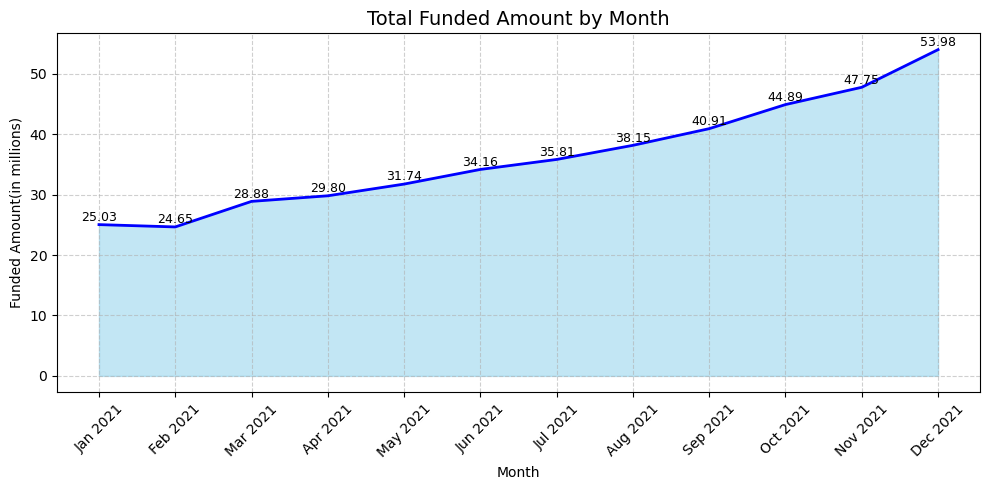

In [50]:
monthly_funded = (
    df.sort_values('issue_date')
      .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
      .groupby('month_name',sort=False)['loan_amount']
      .sum()
      .div(1000000)
      .reset_index(name='loan_amount_millions')
)

plt.figure(figsize=(10, 5))
plt.fill_between(range(len(monthly_funded)), monthly_funded['loan_amount_millions'],color='skyblue',alpha=0.5)
plt.plot(range(len(monthly_funded)), monthly_funded['loan_amount_millions'],color='blue',linewidth=2)


for i, row in monthly_funded.iterrows():
    plt.text(i, row['loan_amount_millions'] + 0.1, f"{row['loan_amount_millions']:.2f}",
             ha='center', va='bottom', fontsize=9, rotation=0, color='black')

plt.title('Total Funded Amount by Month',fontsize=14)
plt.xlabel('Month')
plt.ylabel('Funded Amount(in millions)')
plt.xticks(ticks=range(len(monthly_funded)),labels=monthly_funded['month_name'],rotation=45)
plt.grid(True,linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Monthly Trends by Issue Date for Total Amount Received

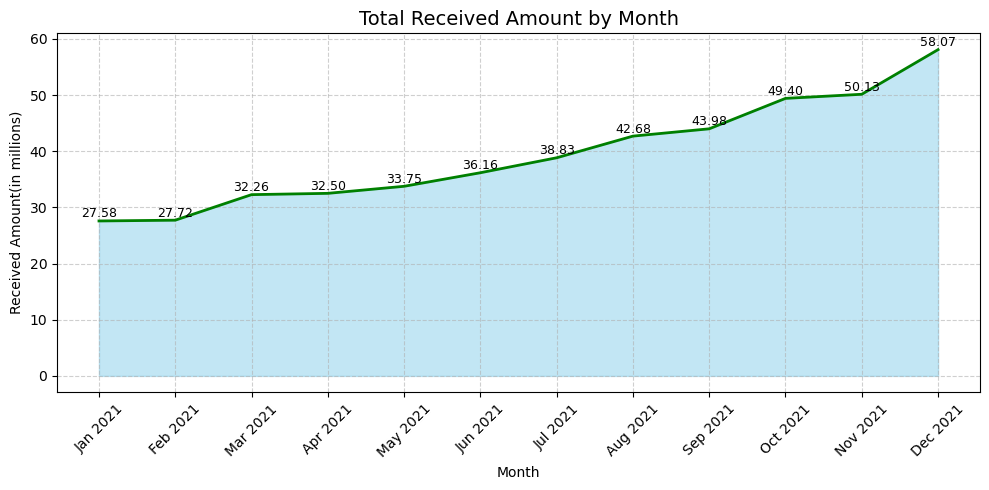

In [56]:
monthly_received = (
    df.sort_values('issue_date')
      .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
      .groupby('month_name',sort=False)['total_payment']
      .sum()
      .div(1000000)
      .reset_index(name='received_amount_millions')
)

plt.figure(figsize=(10, 5))
plt.fill_between(range(len(monthly_received)), monthly_received['received_amount_millions'],color='skyblue',alpha=0.5)
plt.plot(range(len(monthly_received)), monthly_received['received_amount_millions'],color='green',linewidth=2)


for i, row in monthly_received.iterrows():
    plt.text(i, row['received_amount_millions'] + 0.1, f"{row['received_amount_millions']:.2f}",
             ha='center', va='bottom', fontsize=9, rotation=0, color='black')

plt.title('Total Received Amount by Month',fontsize=14)
plt.xlabel('Month')
plt.ylabel('Received Amount(in millions)')
plt.xticks(ticks=range(len(monthly_received)),labels=monthly_received['month_name'],rotation=45)
plt.grid(True,linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Monthly Trends by Issue Date for Total Loan applications

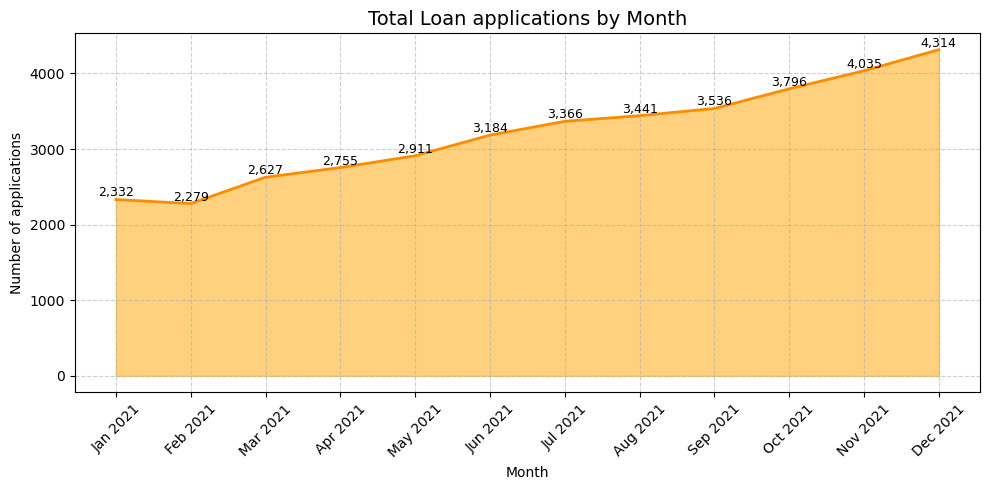

In [67]:
monthly_applications = (
    df.sort_values('issue_date')
      .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
      .groupby('month_name',sort=False)['id']
      .count()
      .reset_index(name='loan_applications_count')
)

plt.figure(figsize=(10, 5))
plt.fill_between(range(len(monthly_applications)), monthly_applications['loan_applications_count'],color='orange',alpha=0.5)
plt.plot(range(len(monthly_applications)), monthly_applications['loan_applications_count'],color='darkorange',linewidth=2)


for i, row in monthly_applications.iterrows():
    plt.text(i, row['loan_applications_count'] + 0.5, f"{int(row['loan_applications_count']):,}",
             ha='center', va='bottom', fontsize=9, rotation=0, color='black')

plt.title('Total Loan applications by Month',fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of applications')
plt.xticks(ticks=range(len(monthly_applications)),labels=monthly_applications['month_name'],rotation=45)
plt.grid(True,linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Regional Analysis By State For Total Funded Amount 

<function matplotlib.pyplot.show(close=None, block=None)>

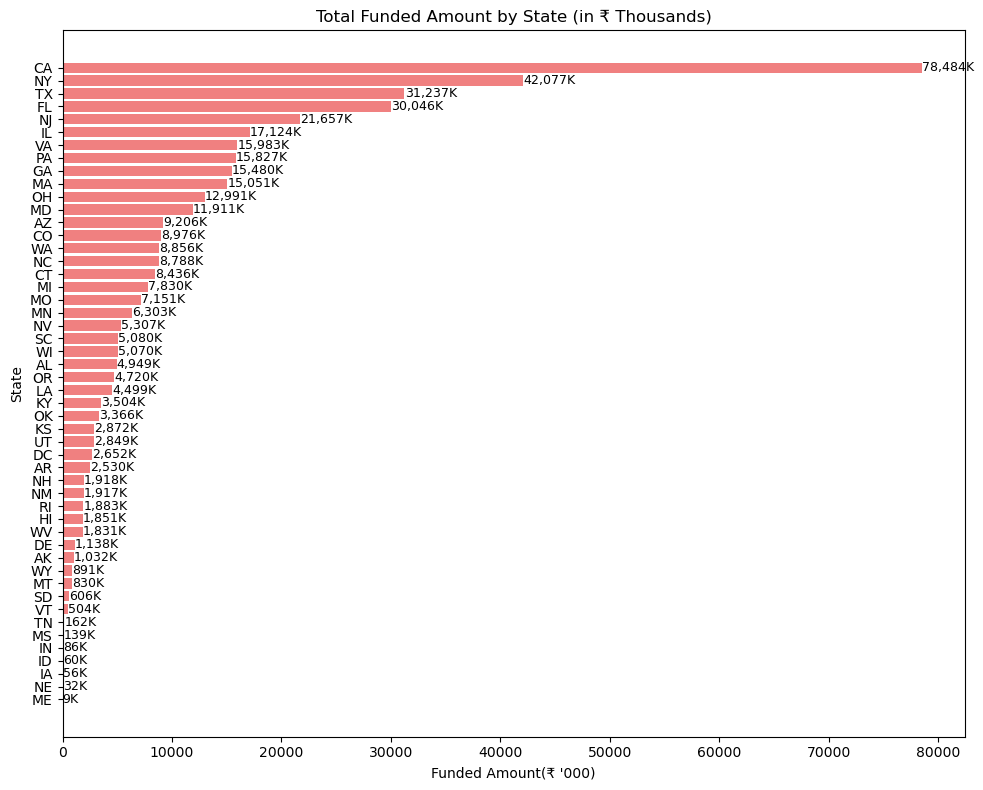

In [71]:
state_funding = df.groupby('address_state')['loan_amount'].sum().sort_values(ascending=True)
state_funding_thousands = state_funding / 1000

plt.figure(figsize=(10,8))
bars = plt.barh(state_funding_thousands.index,state_funding_thousands.values, color='lightcoral')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2,
            f'{width:,.0f}K', va='center', fontsize=9)

plt.title('Total Funded Amount by State (in ₹ Thousands)')
plt.xlabel('Funded Amount(₹ \'000)')
plt.ylabel('State')
plt.tight_layout()
plt.show

### Loan Term Analysis by Total Funded Amount

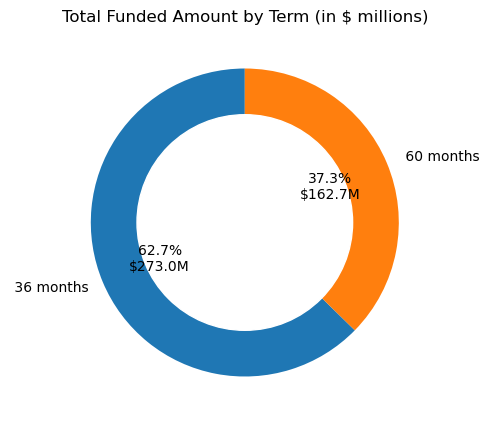

In [79]:
import matplotlib.pyplot as plt

term_funding_millions = df.groupby('term')['loan_amount'].sum() / 1000000
total_funding = sum(term_funding_millions)

plt.figure(figsize=(5,5))
plt.pie(
    term_funding_millions,
    labels=term_funding_millions.index,
    autopct=lambda p: f"{p:.1f}%\n${p * total_funding / 100:.1f}M",
    startangle=90,
    wedgeprops={'width': 0.4}
)
plt.gca().add_artist(plt.Circle((0,0), 0.70, color='White'))
plt.title("Total Funded Amount by Term (in $ millions)")
plt.show()


### Employee Length by Total Funded Amount

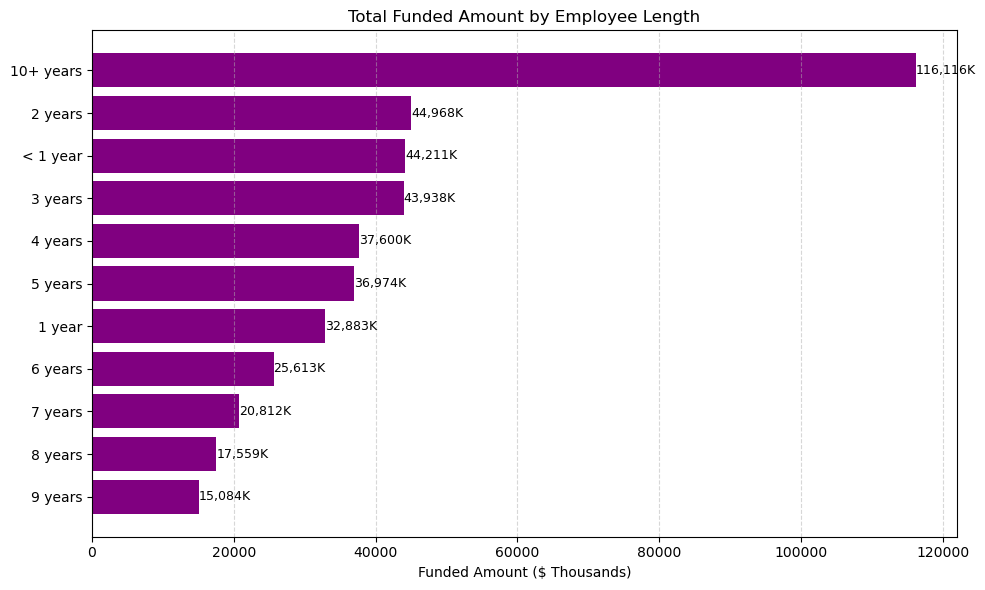

In [88]:
emp_funding = df.groupby('emp_length')['loan_amount'].sum().sort_values() / 1000

plt.figure(figsize=(10,6))
bars = plt.barh(emp_funding.index, emp_funding, color='purple')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2,
            f'{width:,.0f}K', va='center', fontsize=9)

plt.xlabel("Funded Amount ($ Thousands)")  # Changed ₹ to $ assuming loan data currency
plt.title("Total Funded Amount by Employee Length")
plt.grid(axis='x', linestyle='--', alpha=0.5)  # Fixed typo: linesytle → linestyle
plt.tight_layout()
plt.show()


## Loan Purpose By Total Funded Amount

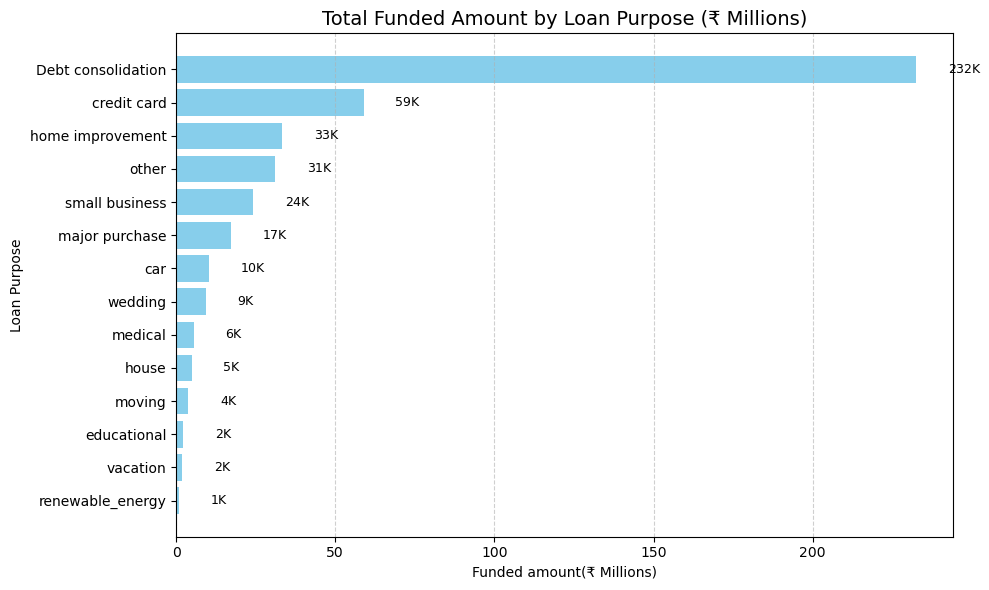

In [90]:
purpose_funding_millions = (df.groupby('purpose')['loan_amount'].sum().sort_values()/1000000)

plt.figure(figsize=(10,6))
bars = plt.barh(purpose_funding_millions.index, purpose_funding_millions.values, color='skyblue')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2,
            f'{width:,.0f}K', va='center', fontsize=9)

plt.title('Total Funded Amount by Loan Purpose (₹ Millions)', fontsize=14)
plt.xlabel('Funded amount(₹ Millions)')
plt.ylabel('Loan Purpose')
plt.grid(axis='x', linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()

In [95]:
#Target Distribution 
print("Loan Status Distribution:")
print(df['loan_status'].value_counts(normalize=True))


Loan Status Distribution:
loan_status
Fully Paid     0.833290
Charged Off    0.138247
Current        0.028463
Name: proportion, dtype: float64


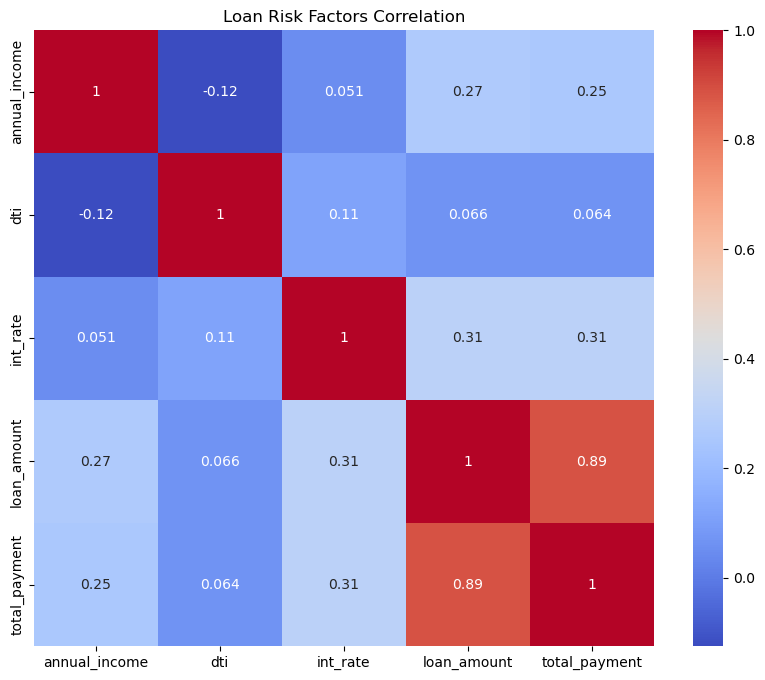

In [96]:
#  FIXED Correlation Heatmap
numeric_cols = ['annual_income','dti','int_rate','loan_amount','total_payment']
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Loan Risk Factors Correlation')
plt.show()

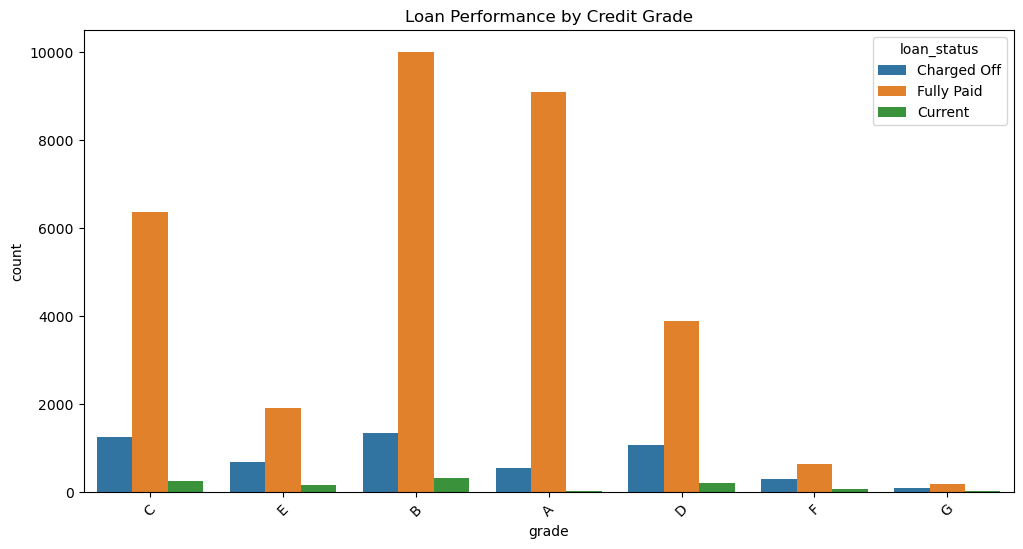

In [98]:
# Grade vs Approval (add this)
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='grade', hue='loan_status')
plt.title('Loan Performance by Credit Grade')
plt.xticks(rotation=45)
plt.show()
